# **Importing Dependancies**

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import nltk
from wordcloud import WordCloud # visualize the most common words
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [87]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# **Importing DataSets**

1. Train dataset

In [88]:
with open('/content/train_data.txt', 'r') as file:
    train_data = file.readlines()

In [89]:
rows = [line.strip().split(':::') for line in train_data]

In [90]:
train = pd.DataFrame(rows,columns=['ID','Title','Genre','Description'])

In [91]:
train.drop('ID',axis=1,inplace=True)

In [92]:
train['length'] = train['Description'].apply(len)

In [93]:
train

Title          Genre  \
0                     Oscar et la dame rose (2009)          drama    
1                                     Cupid (1997)       thriller    
2                 Young, Wild and Wonderful (1980)          adult    
3                            The Secret Sin (1915)          drama    
4                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54209                              "Bonino" (1953)         comedy    
54210                  Dead Girls Don't Cry (????)         horror    
54211    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54212                     Make Your Own Bed (1944)         comedy    
54213   Nature's Fury: Storm of the Century (2006)        history    

                                             Description  length  
0       Listening in to a conversation between his do...     546  
1       A brother and sister with a past incestuous r...     184  
2       As the bus empties the students for their fie...     650  
3       To help their unemployed father make ends mee...    1082  
4       The film's title refers not only to the un-re...     625  
...                                                  ...     ...  
54209   This short-lived NBC live sitcom centered on ...     507  
54210   The NEXT Generation of EXPLOITATION. The sist...     781  
54211   Ze bestaan echt, is a stand-up comedy about g...     255  
54212   Walter and Vivian live in the country and hav...     642  
54213   On Labor Day Weekend, 1935, the most intense ...     311  

[54214 rows x 4 columns]

In [94]:
train.Genre.value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

2. Test Dataset

In [95]:
with open('/content/test_data.txt', 'r') as file:
    test_data = file.readlines()

In [96]:
rows = [line.strip().split(':::') for line in test_data]

In [97]:
test = pd.DataFrame(rows,columns=['ID','Title','Description'])

In [98]:
id = test.ID

In [99]:
test.drop('ID',axis=1,inplace=True)

In [100]:
test['length'] = test['Description'].apply(len)

In [101]:
test

Title  \
0                 Edgar's Lunch (1998)    
1             La guerra de papá (1977)    
2          Off the Beaten Track (2010)    
3               Meu Amigo Hindu (2015)    
4                    Er nu zhai (1955)    
...                                 ...   
54195   "Tales of Light & Dark" (2013)    
54196      Der letzte Mohikaner (1965)    
54197              Oliver Twink (2007)    
54198                Slipstream (1973)    
54199        Curitiba Zero Grau (2010)    

                                             Description  length  
0       L.R. Brane loves his life - his car, his apar...     510  
1       Spain, March 1964: Quico is a very naughty ch...     674  
2       One year in the life of Albin and his family ...     590  
3       His father has died, he hasn't spoken with hi...     681  
4       Before he was known internationally as a mart...     814  
...                                                  ...     ...  
54195   Covering multiple genres, Tales of Light & Da...     701  
54196   As Alice and Cora Munro attempt to find their...     367  
54197   A movie 169 years in the making. Oliver Twist...     324  
54198   Popular, but mysterious rock D.J Mike Mallard...     386  
54199   Curitiba is a city in movement, with rhythms ...     577  

[54200 rows x 3 columns]

# **Data Visualization**

In [102]:
train.head()

Title       Genre  \
0       Oscar et la dame rose (2009)       drama    
1                       Cupid (1997)    thriller    
2   Young, Wild and Wonderful (1980)       adult    
3              The Secret Sin (1915)       drama    
4             The Unrecovered (2007)       drama    

                                         Description  length  
0   Listening in to a conversation between his do...     546  
1   A brother and sister with a past incestuous r...     184  
2   As the bus empties the students for their fie...     650  
3   To help their unemployed father make ends mee...    1082  
4   The film's title refers not only to the un-re...     625

In [103]:
train.Genre.value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

**Genres**

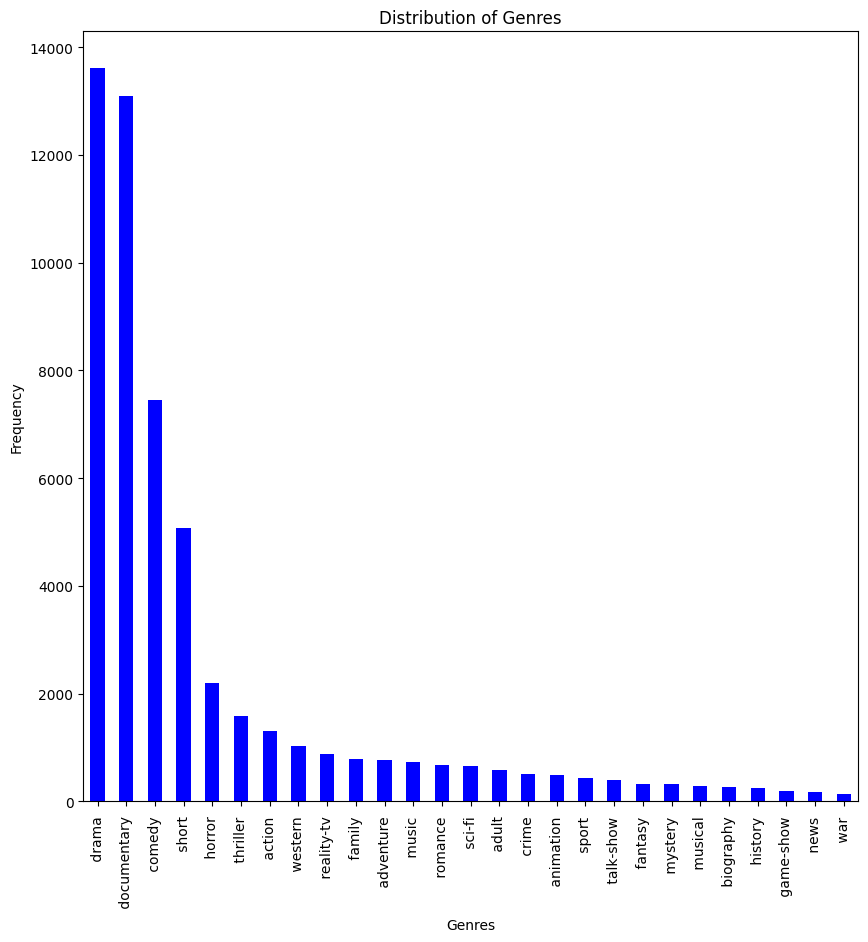

In [104]:
plt.figure(figsize=(10,10))
train['Genre'].value_counts().plot(kind='bar',colormap='winter')
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency');

**Handling Outliers**

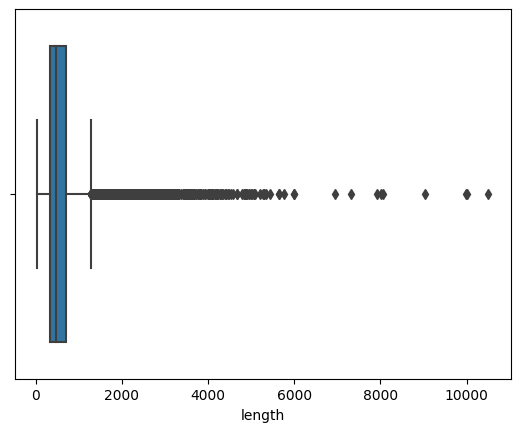

In [105]:
sns.boxplot(x=train['length']);

In [106]:
Q1 = train.length.quantile(0.25)
Q3 = train.length.quantile(0.75)

IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

outliers = train[(train.length < min) | (train.length > max)]

In [107]:
train = train[train['length'] < 1500]

<Axes: xlabel='length'>

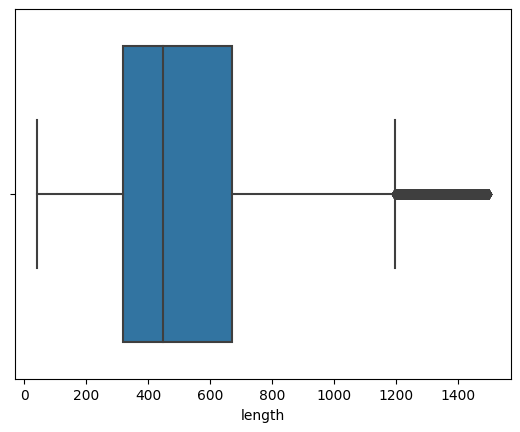

In [108]:
sns.boxplot(x=train.length)

In [109]:
def visualize(label):
  words = ''
  for msg in train[train['Genre'] == label]['Description']:
    msg = msg.lower()
    words += msg + ''
  wordcloud = WordCloud(width=600,height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

# **Data Preprocessing**

**Lemmatizing the Text**

In [110]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [111]:
lemmatizer = WordNetLemmatizer()
def lemmatize_description(description):
    words = word_tokenize(description)
    tagged_words = nltk.pos_tag(words)

    lemmatized_words = []
    for word, tag in tagged_words:
        pos = get_wordnet_pos(tag)
        lemmatized_word = lemmatizer.lemmatize(word, pos)
        lemmatized_words.append(lemmatized_word)

    return ' '.join(lemmatized_words)

**Encoding the Genre category**

In [112]:
encoder = LabelEncoder()
train['Genre'] = encoder.fit_transform(train['Genre'])

<ipython-input-112-de02987dae35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Genre'] = encoder.fit_transform(train['Genre'])


**Data Processing-2**

In [113]:
train.drop('length',axis=1,inplace=True)

<ipython-input-113-0747a36ef85d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('length',axis=1,inplace=True)


In [114]:
train.drop('Title',axis=1,inplace=True)

<ipython-input-114-cc5ffe9e1b85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Title',axis=1,inplace=True)


In [115]:
train

Genre                                        Description
0          8   Listening in to a conversation between his do...
1         24   A brother and sister with a past incestuous r...
2          1   As the bus empties the students for their fie...
3          8   To help their unemployed father make ends mee...
4          8   The film's title refers not only to the un-re...
...      ...                                                ...
54209      5   This short-lived NBC live sitcom centered on ...
54210     13   The NEXT Generation of EXPLOITATION. The sist...
54211      7   Ze bestaan echt, is a stand-up comedy about g...
54212      5   Walter and Vivian live in the country and hav...
54213     12   On Labor Day Weekend, 1935, the most intense ...

[51932 rows x 2 columns]

**Vectorizing the Text**

In [116]:
vectorizer = TfidfVectorizer(analyzer='word',decode_error='ignore',lowercase=True,stop_words='english')

In [117]:
inputs_train, inputs_test , y_train, y_test = train_test_split(train['Description'],train['Genre'],test_size=0.2)

In [118]:
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)

# **Modelling**

In [137]:
pipeline = Pipeline([('tfidf',vectorizer),('classifier',RandomForestClassifier())])

In [121]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [122]:
model.score(X_test,y_test)

0.4816597670164629

In [139]:
X = train['Description']
y = train['Genre']

In [140]:
pipeline.fit(X,y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(decode_error='ignore', stop_words='english')),
                ('classifier', RandomForestClassifier())])

# **WordClouds**

In [153]:
def visualize(label):
  words = ''
  for msg in train[train['Genre'] == label]['Description']:
    msg = msg.lower()
    words += msg + ''
  wordcloud = WordCloud(width=600,height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

Word Cloud of:   action 


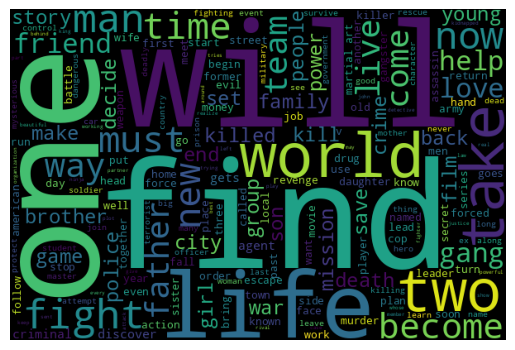


Word Cloud of:   adult 


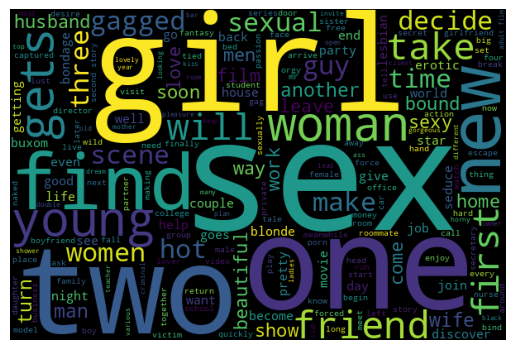


Word Cloud of:   adventure 


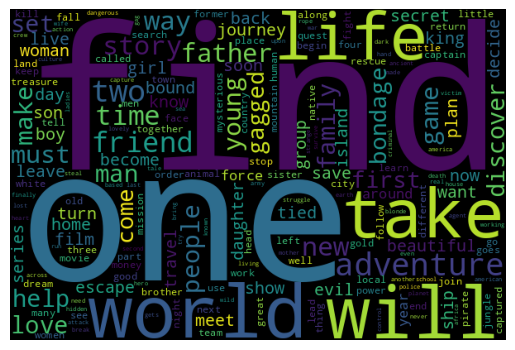


Word Cloud of:   animation 


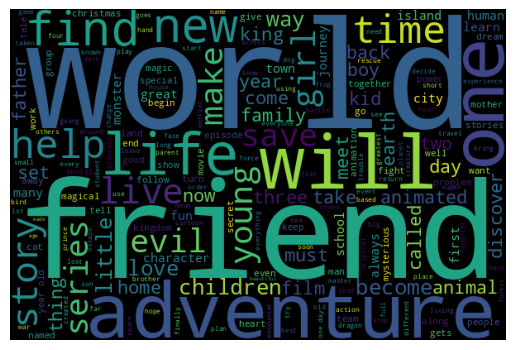


Word Cloud of:   biography 


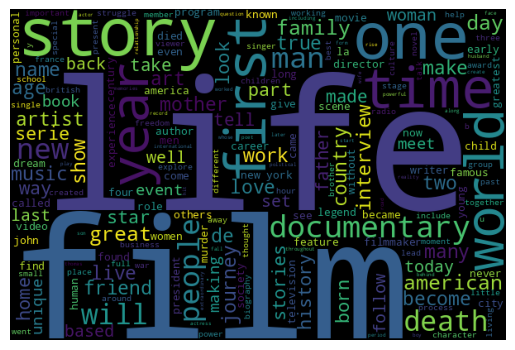


Word Cloud of:   comedy 


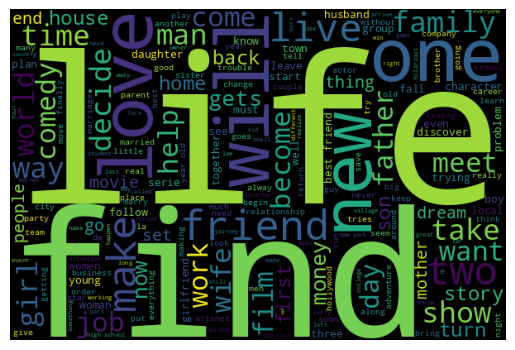


Word Cloud of:   crime 


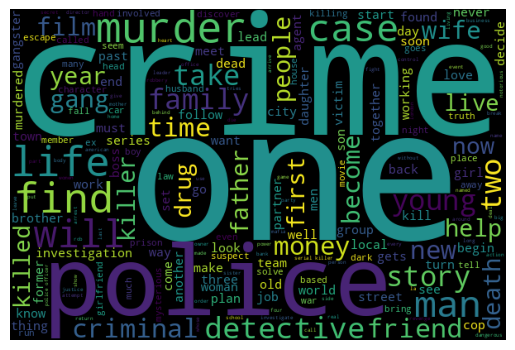


Word Cloud of:   documentary 


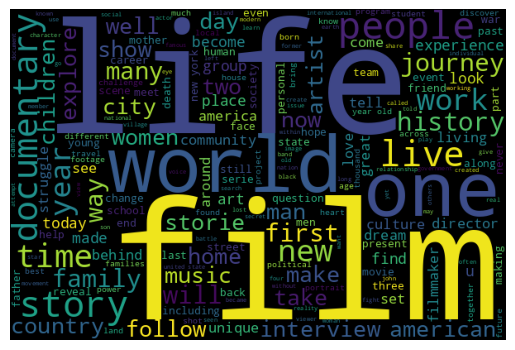


Word Cloud of:   drama 


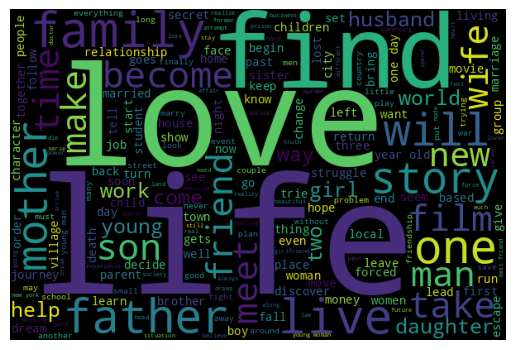


Word Cloud of:   family 


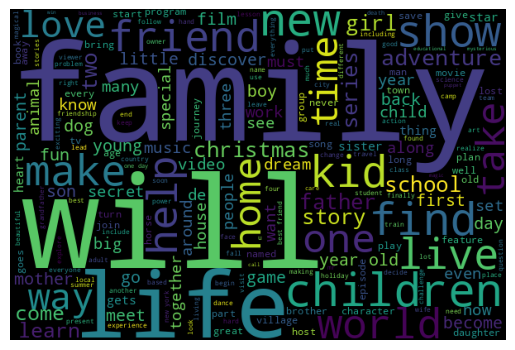


Word Cloud of:   fantasy 


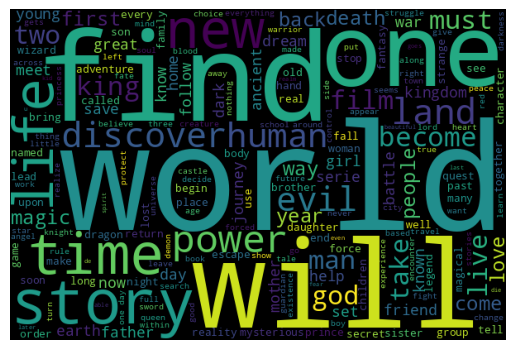


Word Cloud of:   game-show 


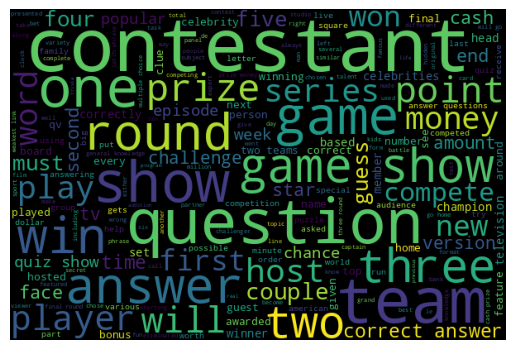


Word Cloud of:   history 


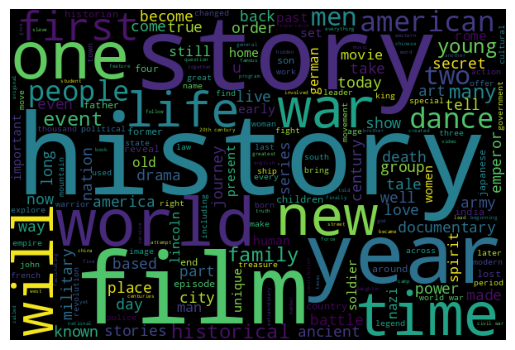


Word Cloud of:   horror 


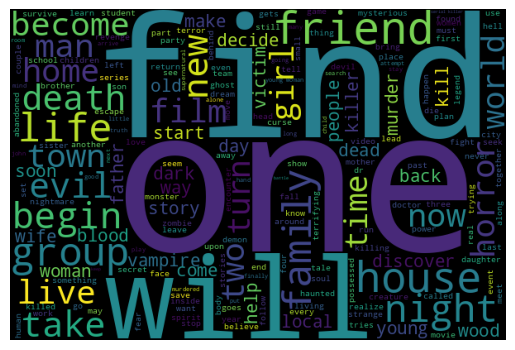


Word Cloud of:   music 


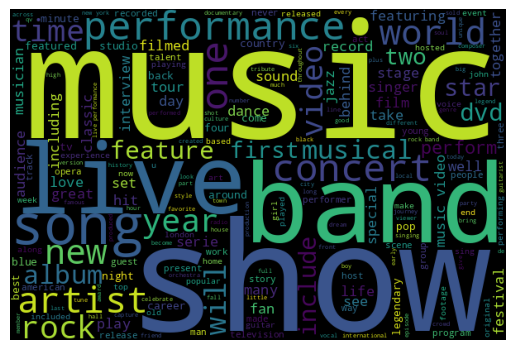


Word Cloud of:   musical 


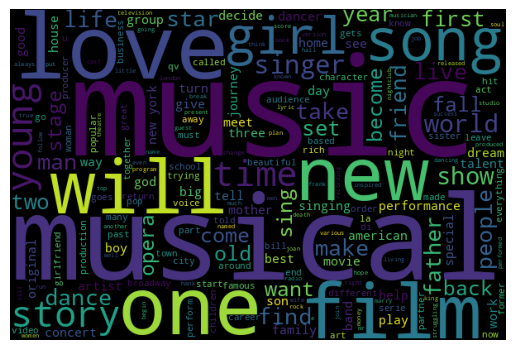


Word Cloud of:   mystery 


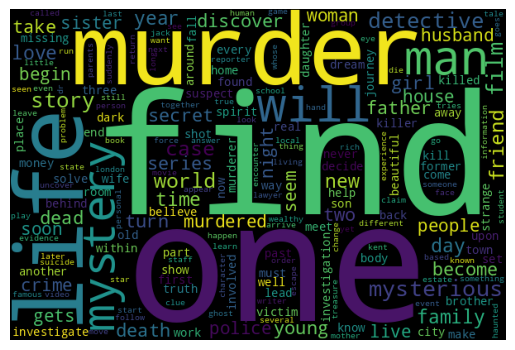


Word Cloud of:   news 


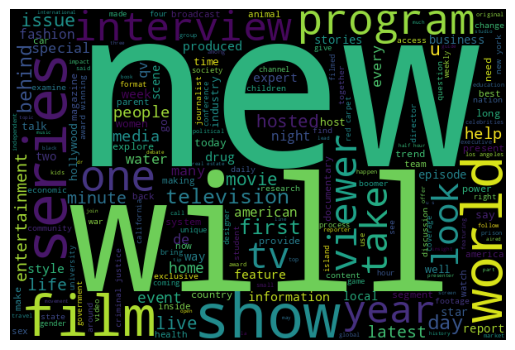


Word Cloud of:   reality-tv 


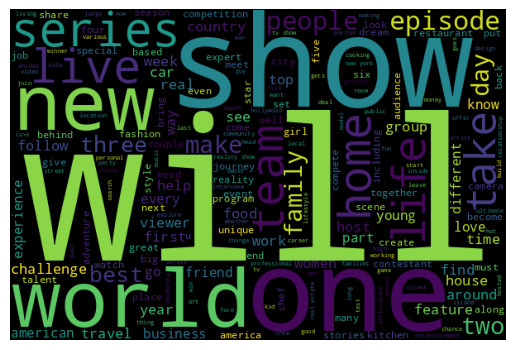


Word Cloud of:   romance 


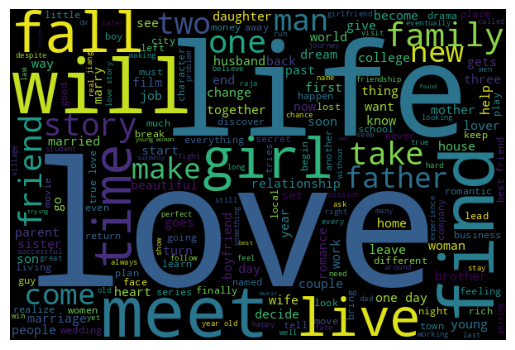


Word Cloud of:   sci-fi 


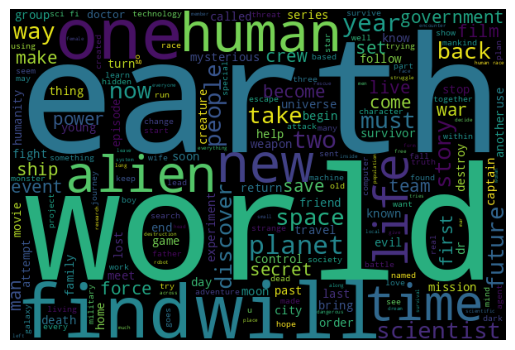


Word Cloud of:   short 


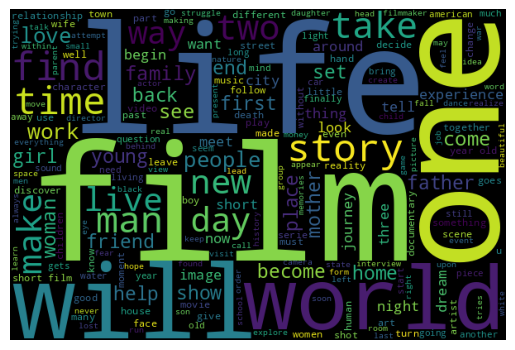


Word Cloud of:   sport 


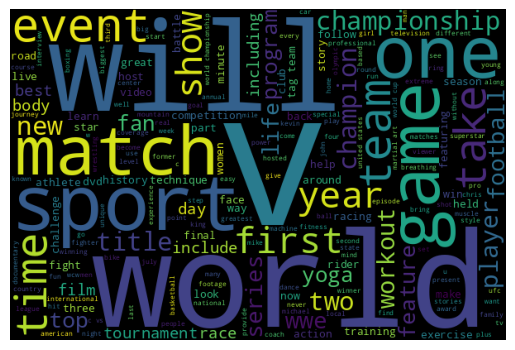


Word Cloud of:   talk-show 


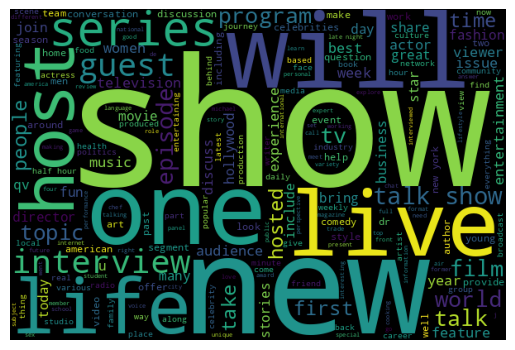


Word Cloud of:   thriller 


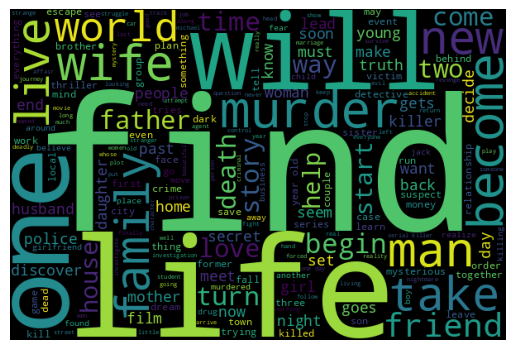


Word Cloud of:   war 


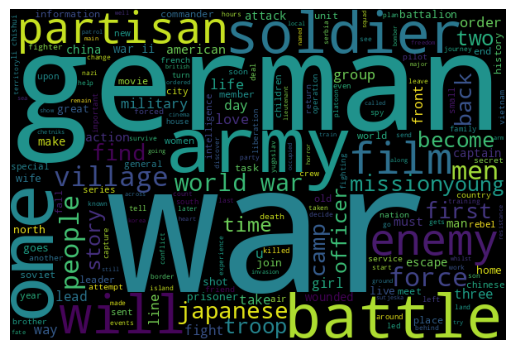

In [162]:
for i in range(0,26):
  label_class = encoder.inverse_transform([i])[0]
  print("Word Cloud of: ",label_class)
  visualize(i)
  print()

[' adult ']


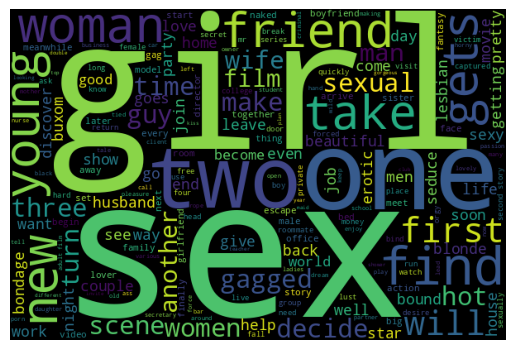

In [156]:
print(encoder.inverse_transform([1]))
visualize(1)

# **Dumping the Model**

In [152]:
import joblib
joblib.dump(pipeline,'movie_pipeline')

['movie_pipeline']